# Assignment 2  - Analytic Report project



## Requirements

Given the dataset
(https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attr
ition-dataset), create an analytic report to answer three below
questions. The report should include the introduction,
describing the data, visualizations (scatter plot, bar graph,
histogram, boxplot, subplot, pie chart, heatmap, etc., each
graph should have an explained analysis followed), filtering
data to different categories, analysis (include t-test or
Mann-whitney for Hypothesis testing) and conclusions.

1. What are key factors that are playing into current attrition rates?
2. What are key factors that are playing into current satisfaction rates?
3. When are employees leaving?

## Dataset Description

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

    Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

    EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

    JobInvolvement
    1 'Low' 2 'Medium' 3 'High' 4 'Very High'

    JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

    PerformanceRating
    1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

    RelationshipSatisfaction
    1 'Low' 2 'Medium' 3 'High' 4 'Very High'

    WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

##  CONTENTS :
#####  1. Exploratory Data Analysis
    ######   1.1 Importing Various Modules
    ######   1.2 Reading the data from a CSV file
    ######   1.3 Missing Values Treatment
    ######   1.4 Data histogram
##### 2. Analysis  what  key factors that are playing into current attrition rates?
    ###### 2.1 Statistic the attrition rates
    ###### 2.2 How Age impact to Attrition rates
    ###### 2.3 How YearsWithCurrManager  impact to Attrition rates
##### 3.  Analysis  what   key factors that are playing into current satisfaction rates?
    ###### 3.1 How MonthlyIncome  impact to JobSatisfaction rates
    ###### 3.2 How EnviromentSatisfation  impact to JobSatisfaction rates
##### 4. Conclusions -when  employees are leaving ?

## 1 ) Exploratory Data Analysis

## 1.1 ) Importing Various Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for plotting graphs
%matplotlib inline
import numpy as np
# Standard plotly imports
import plotly
# import plotly.plotly as py
# import chart_studio.plotly  as py
# import plotly.plotly as py
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

from scipy.stats import norm, skew
from scipy import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg

## 1.2 ) Reading the data from a CSV file

In [3]:
data = pd.read_csv("HR-Employee-Attrition.csv")

In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
data.shape

(1470, 35)

In [296]:

data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
# data.info()

In [11]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 1.3 ) Missing Values Treatment

In [9]:
#Missing values check
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

###### - There is no missing values

## 1.4 ) Data histogram

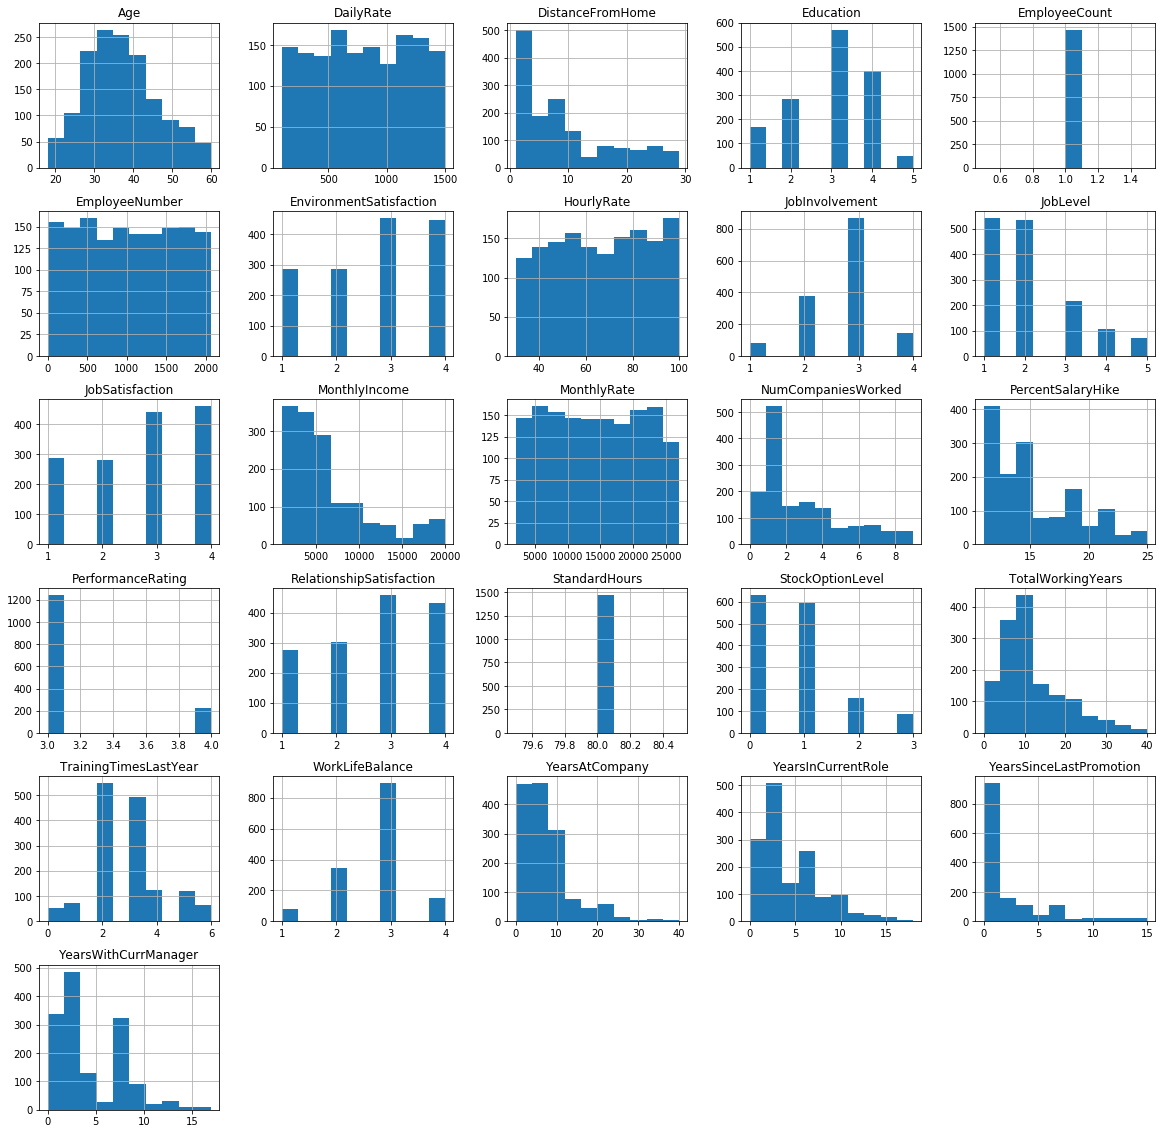

In [10]:
data.hist(figsize=(20,20))
plt.show()

> A few observations can be made based on the information and histograms for numerical features:
- Age , MonthlyIncome , YearsWithCurrManager might affect a lot on Attrition
- We will check if  MonthlyIncome , EnviromentSatisfation , JobInvolvement affect satisfaction rates

## 2 ) Analysis  what  key factors that are playing into current attrition rates?

## 2.1) Statistic the attrition rates

In [292]:
#Copy categorical data 
# hr_data_cat = data[['Attrition', 'BusinessTravel','Department',
#                        'EducationField','Gender','JobRole',
#                        'MaritalStatus',
#                        'Over18', 'OverTime']].copy()
# hr_data_cat.head()

In [30]:
hr_Attrition =  data[(data.Attrition=='Yes') ]

In [32]:
# số lượng  Attrition
hr_Attrition.shape


(237, 35)

In [11]:
hr_Attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [41]:
hr_n_Attrition =  data[(data.Attrition=='No') ]
hr_n_Attrition.shape

(1233, 35)

In [14]:
# vẽ tỉ lệ attrition và not attrition

### xem tỉ lệ trạng thái của attrition rate

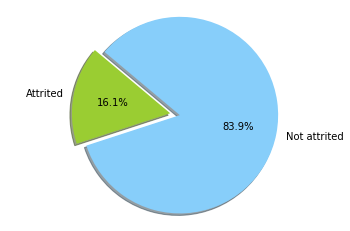

In [17]:
# Data to plot
labels = 'Attrited', 'Not attrited'
sizes = [hr_Attrition.shape[0], hr_n_Attrition.shape[0]]
colors = [ 'yellowgreen','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## 2.2) How Age impact to Attrition rates

### Convert the data based on Attrition rates from amount of employees into portion of employee (%)

In [114]:
# data_by_attrition = data.groupby(['Attrition' , 'Age']).Age.agg('count').to_frame('num_portion');
# data_by_attrition.groupby(level=0).apply(lambda x:
#                                                  100 * x / float(x.sum()))
# data_by_attrition.reset_index()
# state_office = df.groupby(['state', 'office_id'])['sales'].sum().reset_index()
# state = df.groupby(['state'])['sales'].sum().reset_index()
# state_office = state_office.merge(state, left_on='state', right_on ='state', how = 'left')
# state_office['sales_ratio'] = 100*(state_office['sales_x']/state_office['sales_y'])

In [127]:

data_by_attrition_age = data.groupby(['Attrition' , 'Age']).Age.agg('count').to_frame('num_emp').reset_index()
data_by_attrition = data.groupby(['Attrition']).Age.agg('count').to_frame('num_emp').reset_index()
data_2_2 = data_by_attrition_age.merge(data_by_attrition, left_on='Attrition', right_on ='Attrition', how = 'left')
data_2_2['num_em_ratio'] = 100*(data_2_2['num_emp_x']/data_2_2['num_emp_y'])
data_2_2.head()

,Attrition,Age,num_emp_x,num_emp_y,num_em_ratio
0,No,18,4,1233,0.324412
1,No,19,3,1233,0.243309
2,No,20,5,1233,0.405515
3,No,21,7,1233,0.567721
4,No,22,11,1233,0.892133


In [105]:
data_by_attrition.dtypes

num_portion    int64
dtype: object

Text(0.5, 1, 'No. of employee')

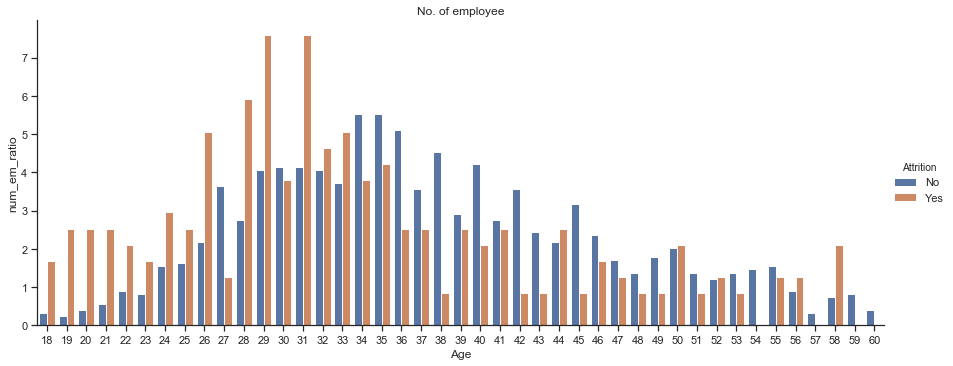

In [137]:
# sns.countplot(x='Age',data = data, hue='Attrition',size=10,aspect=3)
# sns.factorplot(data=data, x='Age',kind='count',size=5,aspect=1.5, hue='Attrition' )
sns.factorplot(data=data_2_2, x='Age', y='num_em_ratio',kind='bar',size=5,aspect=2.5, hue='Attrition' )
# plt.xticks(rotation=90)
plt.title("No. of employee")

#### We will check the affection of Age of employees from 2 sample [ 18 - 35 ] and [ 36 - 60 ]   which one tend to leave more

> 1. Identify
    >Populations:
     - Pop 1: Ex-employees (younger group) who under 36
     - Pop 2: Ex-employees (older group) who older 36

    >Distribution:
     - Mean of Difference Scores: Distribution of Mean Differences

    > Test & Assumptions: One group of participants that is studied at two time points, paired-samples t test
        - Data are interval
        - Probably not random selection
    
> 2. State the null and research hypotheses

    - H0: younger group will affect the same older group on attrition rate

    - H1: younger group will make the different affection from older group on attrition rate

> 3. Determine critical values
     p = .05        t = ± 2.365


In [155]:
# hr_Attrition_by_age_u_35 = hr_Attrition[hr_Attrition['Age'] <= 35 ].groupby('Age').Age.agg('count').to_frame('c').reset_index();
# hr_Attrition_by_age_u_35 = hr_Attrition[hr_Attrition['Age'] < 35 ].groupby('Age').agg({'Age':[pd.Series.count]});
# Group all employees who under 35 and already quit
hr_Attrition_by_age_u_35 = data_2_2 [ ( data_2_2['Age'] <=35)  &  (data_2_2['Attrition'] == 'No')  ]
print("Number of Ex-employee who are under 35 is "+ str(hr_Attrition_by_age_u_35.num_em_ratio.sum()) +" % ")


Number of Ex-employee who are under 35 is 46.14760746147607 % 


In [153]:
# hr_Attrition_by_age_o_35 = hr_Attrition[hr_Attrition['Age'] > 35 ].groupby('Age').agg({'Age':[pd.Series.count]});
# hr_Attrition_by_age_o_35 = hr_Attrition[hr_Attrition['Age'] > 35 ].groupby('Age').Age.agg('count').to_frame('c').reset_index();
# Group all employees who over 35 and already quit
hr_Attrition_by_age_o_35 = data_2_2 [ (data_2_2['Age'] >35 ) &  (data_2_2['Attrition'] == 'No') ]
print("Number of Ex-employee who are under 35 is "+ str(hr_Attrition_by_age_o_35.num_em_ratio.sum()) +" % ")

# print("Number of Ex-employee who are over 35 is "+ str(hr_Attrition_by_age_o_35.c.sum())+" and the mean is "+str(hr_Attrition_by_age_o_35.c.mean()))

Number of Ex-employee who are under 35 is 53.85239253852393 % 


In [156]:
# khi 2 tập sample khác nhau về số lượng equal_var=False
t2, p2 = stats.ttest_ind(hr_Attrition_by_age_o_35.num_em_ratio,hr_Attrition_by_age_u_35.num_em_ratio,equal_var=False)
print("t = " + str(t2))
print("p = " + str(p2))

t = -0.816491689608509
p = 0.4208790675649613


#### Fail to  Reject null hypothesis
- younger group will make the different affection from older group on attrition rate ( Higher ), t(237) = -0.816491689608509, p > .05


## 2.3) How YearsWithCurrManager  impact to Attrition rates

Text(0.5, 1, 'No. of employee')

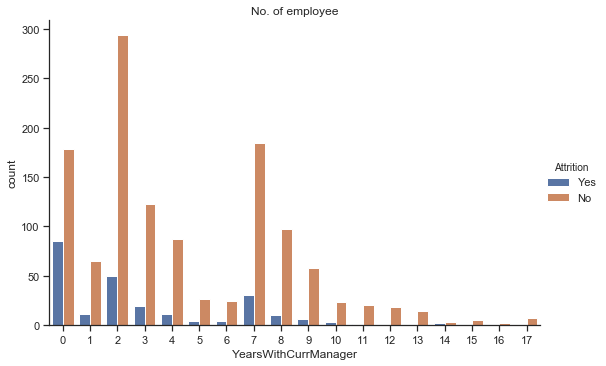

In [9]:

# sns.countplot(x='Age',data = data, hue='Attrition',size=10,aspect=3)
sns.factorplot(data=data,kind='count',size=5,aspect=1.5,x='YearsWithCurrManager', hue='Attrition')
# plt.xticks(rotation=90)
# sns.distplot(data['YearsWithCurrManager']) 
plt.title("No. of employee")

In [169]:
data_2_3 = data.groupby(['YearsWithCurrManager','Attrition']).size().to_frame('num_emp').reset_index();
data_2_3.head()

,YearsWithCurrManager,Attrition,num_emp
0,0,No,178
1,0,Yes,85
2,1,No,65
3,1,Yes,11
4,2,No,294


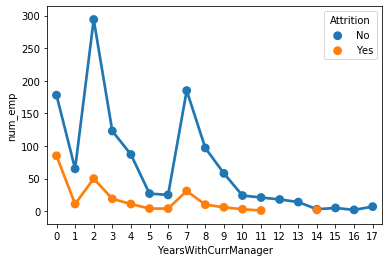

In [176]:
sns.pointplot(x='YearsWithCurrManager', y='num_emp', hue='Attrition', data=data_2_3)

### From 12 - 17 years the Attrition-No sample dont have value so that we just test from 0 - 11 years

> We run ANOVA (2 way) test to check if YearsWithCurrManager affect to number of Attrition (Yes / No)
    - H0 : There is no difference from YearsWithCurrManager
    - H1 : There is the difference from YearsWithCurrManager which affect to number of Attrition
    
    F-crit (0.05,16,1) = 4.9

In [183]:
df2= data_2_3[data_2_3['YearsWithCurrManager'] <17]
formula = 'num_emp ~ C(YearsWithCurrManager)+C(Attrition) '  # + C(Attrition):C(YearsWithCurrManager)
model = ols(formula, df2).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                               sum_sq    df          F    PR(>F)
C(YearsWithCurrManager)  86668.610860  16.0   2.404304  0.064859
C(Attrition)             34711.538462   1.0  15.407115  0.002016
Residual                 27035.461538  12.0        NaN       NaN


> According to the result C(YearsWithCurrManager) has F = 2.4 < F-crit = 4.9 so that we agree  H0 : There is no difference from YearsWithCurrManager with the statistical rate is almost 94%

In [71]:
# run ANOVA test with pingouin lib
# aov = pg.anova(dv='num_emp', between=['YearsWithCurrManager', 'Attrition'], data=df2,
#              detailed=True)

# print(aov)

 ## 3)  Analysis  what   key factors that are playing into current satisfaction rates (JobSatisfaction )?

> There are many factors  affect to JobSatisfaction rates but  I think MonthlyIncome , EnviromentSatisfation might be the key factors so that i will analyse them 

>JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'


In [28]:
# data_2_3 = data.groupby(['YearsWithCurrManager','Attrition']).size().to_frame('num_emp').reset_index();
data_3 = data.groupby('JobSatisfaction').size()
data_3.head()

JobSatisfaction
1    289
2    280
3    442
4    459
dtype: int64

## 3.1) How MonthlyIncome  impact to JobSatisfaction rates

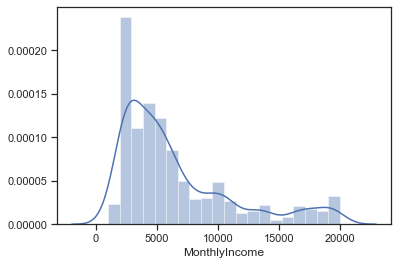

In [11]:
sns.distplot(data['MonthlyIncome']) 

In [188]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    data['MonthlyIncome'].min(), data['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


### Hypothesis : We want to check if the rate of the employees who have 'Low' JobSatisfaction from 2 group which has the salary <= 5000 and  the salary from 5000 to 10.000 is different

### but infact we just check  if the rate of the employees  from 2 group which has the salary <= 5000 and  the salary from 5000 to 10.000 is different


> 1. Identify
    >Populations:
     - Pop 1: Employees who have salary <= 5000 and have JobSatisfaction is "LOW"
     - Pop 2: Employees who have salary > 5000  and <=10.000 ,  have JobSatisfaction is  "LOW"

    >Distribution:
     - Mean of Difference Scores: Distribution of Mean Differences

    > Test & Assumptions: One group of participants that is studied at two time points, paired-samples t test
        - Data are interval
        - Probably not random selection
    
> 2. State the null and research hypotheses

    - H0: JobSatisfaction rate  from 2 group is the same

    - H1: JobSatisfaction rate  from 2 group is the different

> 3. Determine critical values
     p = .05        t = ± 2.365





In [38]:
# df_un_5000 = data[ (data['JobSatisfaction'] == 1)  &  (data['MonthlyIncome'] <= 5000) ]
df_un_5000 = data[ ( data['MonthlyIncome'] <= 5000) ]
df_un_5000.shape

(749, 35)

In [37]:
df_over_5000 = data[  (data['MonthlyIncome'] > 5000)  &  (data['MonthlyIncome'] < 10000) ]
df_over_5000.shape

(440, 35)

In [40]:
t2, p2 = stats.ttest_ind(df_un_5000.JobSatisfaction,df_over_5000.JobSatisfaction,equal_var=False)
print("t = " + str(t2))
print("p = " + str(p2))

t = -0.791757410437478
p = 0.4287114880469638


#### Fail to Reject null hypothesis
- JobSatisfaction rate  from 2 group is the same
, t(1189) = -0.79 , p > .05



## 3.2) How EnviromentSatisfation  impact to JobSatisfaction rates

In [55]:
df_3_2 = data.groupby(['EnvironmentSatisfaction','JobSatisfaction']).size().reset_index();
df_3_2.head()
# .to_frame('num_emp').reset_index();

,EnvironmentSatisfaction,JobSatisfaction,0
0,1,1,53
1,1,2,47
2,1,3,100
3,1,4,84
4,2,1,55


#### Tranformdata 

In [51]:
def transform_JobSatisfaction(row):
    if 1 == row:
        return 'Low'
    elif (row== 2 ):
        return 'Medium'
    elif (row==3):
        return 'High'
    elif (row==4):
        return 'Very High'
    else:
        return "unknown"

In [60]:
df_3_2['JobSatisfactionLabel'] = df_3_2.JobSatisfaction.apply(lambda x: transform_JobSatisfaction(x))
df_3_2.head()

,EnvironmentSatisfaction,JobSatisfaction,0,JobSatisfactionLabel
0,1,1,53,Low
1,1,2,47,Medium
2,1,3,100,High
3,1,4,84,Very High
4,2,1,55,Low


In [63]:
pd.crosstab(columns=[df_3_2.JobSatisfactionLabel],index=[df_3_2.EnvironmentSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

JobSatisfactionLabel,High,Low,Medium,Very High
EnvironmentSatisfaction,,,,
1,0.25,0.25,0.25,0.25
2,0.25,0.25,0.25,0.25
3,0.25,0.25,0.25,0.25
4,0.25,0.25,0.25,0.25
All,0.25,0.25,0.25,0.25


> we can see from the table above that  the portion of JobSatisfaction by EnvironmentSatisfaction is equal

> we will use ANOVA ONE WAY to check if the portion of JobSatisfaction by EnvironmentSatisfaction is different

    - H0 : the portion of JobSatisfaction by EnvironmentSatisfaction is same
    - H1: the portion of JobSatisfaction by EnvironmentSatisfaction is different
    
>Analysis of Variance or ANOVA tells us whether the differences in the variance between each diet group are statistically significant when compared to the differences within each group.

>One of the core assumptions with ANOVA is that the dependent variable is normally distributed.


>We start by visualizing the impact of each JobSatisfaction on the EnvironmentSatisfaction variable with a box plot. We use the Seaborn data visualization package.  The standard deviations of each diet look similar.

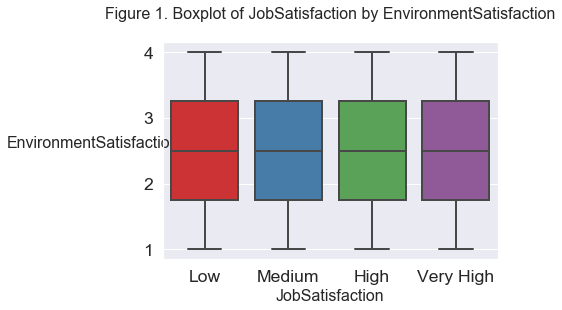

In [64]:
sns.set(font_scale=1.6)  #sets font size for chart scales
ax = sns.boxplot(x = "JobSatisfactionLabel", y = "EnvironmentSatisfaction", data = df_3_2, # calls the boxplot
                 palette="Set1", # sets color scheme 
                 linewidth = 2) # sets chart line width
ax.set_title("Figure 1. Boxplot of JobSatisfaction by EnvironmentSatisfaction\n", fontsize=16) # title 
ax.set_ylabel("EnvironmentSatisfaction", rotation = 0, fontsize=16, labelpad=50) # y-axis label
ax.set_xlabel("JobSatisfaction", rotation = 0, fontsize=16) # x-axis label
plt.show()

In [68]:
# Now we create an Ordinary Least Squares (OLS) model as a precursor to the ANOVA
model = ols("JobSatisfaction ~ EnvironmentSatisfaction", data).fit() 
table = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame
print(table) 
# In a one-way ANOVA the null hypothesis is that the means of the Diet types are equal. We can reject that hypothesis
# because P < 0.05 

                              sum_sq      df         F    PR(>F)
EnvironmentSatisfaction     0.082237     1.0  0.067571  0.794943
Residual                 1786.617763  1468.0       NaN       NaN


### Fail to reject the null hypothesis  p-value  0.794943 > 0.05
the portion of JobSatisfaction by EnvironmentSatisfaction is same

# 4) Conclusion 

> When are employees leaving?
- The peole with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.
- The employees who have YearsWithCurrManager < 0 might leave more that others
- MonthlyIncome is Low might be a key factor make people leave the company